In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#### Задача 1

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):

salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

In [11]:
df = pd.DataFrame({'salary': [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], 
                   'scoring': [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]})

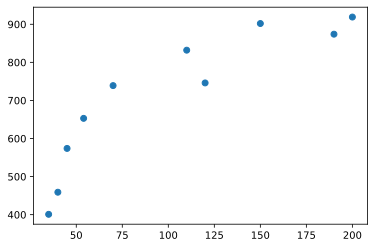

In [12]:
plt.scatter(df['salary'], df['scoring'])

In [13]:
stats.normaltest(df)

NormaltestResult(statistic=array([1.82254793, 1.24931245]), pvalue=array([0.40201175, 0.53544547]))

1. Найдите ковариацию этих двух величин: сначала без использования специальных функций, а затем с помощью функции numpy.cov. Полученные значения должны быть равны.

In [16]:
X = df['salary'] 
Y = df['scoring']

MX = X.mean()
MY = Y.mean()

cov = ((X - MX) * (Y - MY)).sum() / (X.size - 1)
cov

10175.37777777778

In [17]:
np.cov(X, Y)

array([[ 3882.93333333, 10175.37777778],
       [10175.37777778, 33854.32222222]])

2. Найдите коэффициент корреляции Пирсона: с помощью ковариации и средних квадратических отклонений двух признаков, а затем с помощью специальных функций из библиотек numpy и pandas.

In [18]:
corr = cov / X.std(ddof=1) / Y.std(ddof=1)
corr

0.8874900920739163

In [19]:
df.corr()

,salary,scoring
salary,1.00000,0.88749
scoring,0.88749,1.00000


In [23]:
np.corrcoef(X, Y)

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

#### Задача 2

Измерены значения IQ выборки студентов, обучающихся в местных технических вузах:

131, 125, 115, 122, 131, 115, 107, 99, 125, 111

Известно, что в генеральной совокупности IQ распределен нормально. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [29]:
samples = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])
p = 0.95
alpha = 1 - p

Дисперсия не известна - используем t-статистику 

In [30]:
mean = samples.mean()
n = samples.size
std = samples.std(ddof=1)

t1 = stats.t.ppf(alpha / 2, df=n - 1)
t2 = stats.t.ppf(1 - alpha / 2, df=n - 1)

Доверительный интервал

In [31]:
(mean + t1 * std / np.sqrt(n), mean + t2 * std / np.sqrt(n))

(110.55608365158724, 125.64391634841274)

#### Задача 3

Известно, что рост футболистов в сборной распределен нормально с известной дисперсией 25. На выборке объёма 27 выборочное среднее составило 174.2. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

In [60]:
mean = 174.2
std = 5
n = 27
p = 0.95
alpha = 1 - p

Дисперсия известна - используем z-статистику 

In [61]:
t1 = stats.norm.ppf(alpha / 2)
t2 = stats.norm.ppf(1 - alpha / 2)

Доверительный интервал

In [62]:
(mean + t1 * std / np.sqrt(n), mean + t2 * std / np.sqrt(n))

(172.3140237765397, 176.08597622346028)

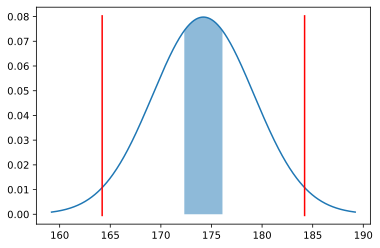

In [64]:
ox = np.linspace(mean - 3 * std, mean + 3 * std, 500)
oy = stats.norm.pdf(ox, loc=mean, scale=std)

ox_fill = np.linspace(mean + t1 * std / np.sqrt(n), mean + t2 * std / np.sqrt(n), 400)
oy_fill = stats.norm.pdf(ox_fill, loc=mean, scale=std)

plt.plot(ox, oy)
plt.fill_between(ox_fill, oy_fill, alpha=0.5)
plt.axvline(x=mean - 2 * std, ymin=0.04, ymax=0.96, color='red')
plt.axvline(x=mean + 2 * std, ymin=0.04, ymax=0.96, color='red')